# **Amazon Reviews Analysis Using Vader, RoBERTa, and NLTK**

**Import Libraries**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from wordcloud import WordCloud


**Load Dataset**

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?select=Reviews.csv

In [105]:
df=pd.read_csv(r"Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [106]:
df['Text'].values[1]


'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [107]:
df.shape


(568454, 10)

**Exploratory Data Analysis**

In [108]:
df['Score'].value_counts()


Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

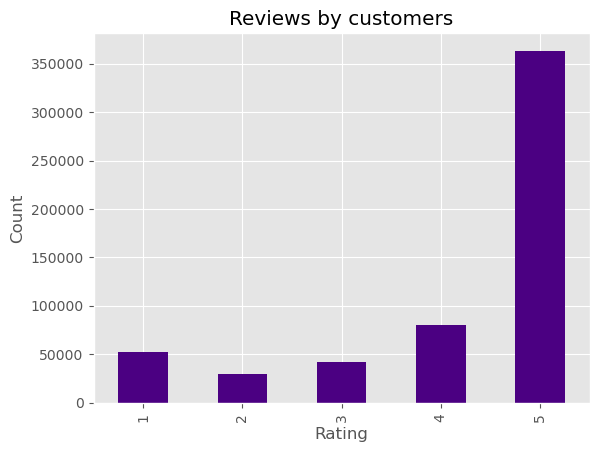

In [109]:
#plotting bar graph
plt=df['Score'].value_counts().sort_index().plot(kind='bar', 
                                                title="Reviews by customers",
                                                color="indigo" )
#Adding X and Y labels
plt.set_xlabel("Rating")
plt.set_ylabel("Count")
plt.plot();


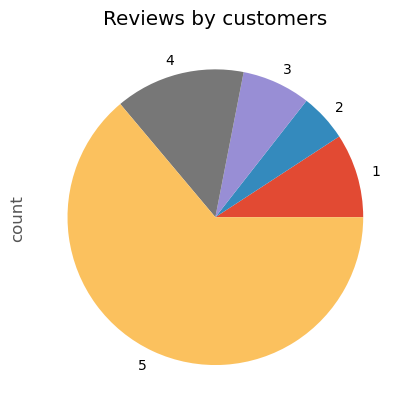

In [110]:
#Plotting Pie chart
plt=df['Score'].value_counts().sort_index().plot(kind='pie', 
                                                title="Reviews by customers")
plt.plot();


In [111]:
df['UserId'].value_counts()


UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: count, Length: 256059, dtype: int64

In [112]:
df.isnull().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

**Plot Word Cloud**

A collection of words presented in different sizes is called a word cloud. A word is more frequently used and considered to be of more importance when it is larger and bolded inside a text.

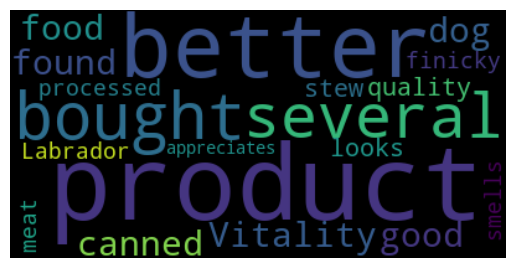

In [115]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = df.Text[0]

# Create a word cloud image:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


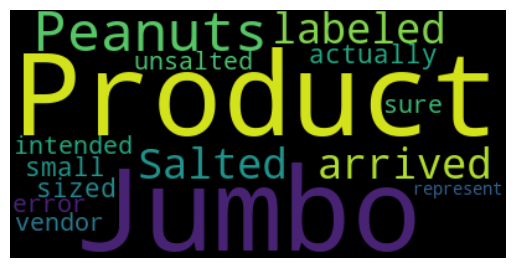

In [116]:
text = df.Text[1]

# Create a word cloud image:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


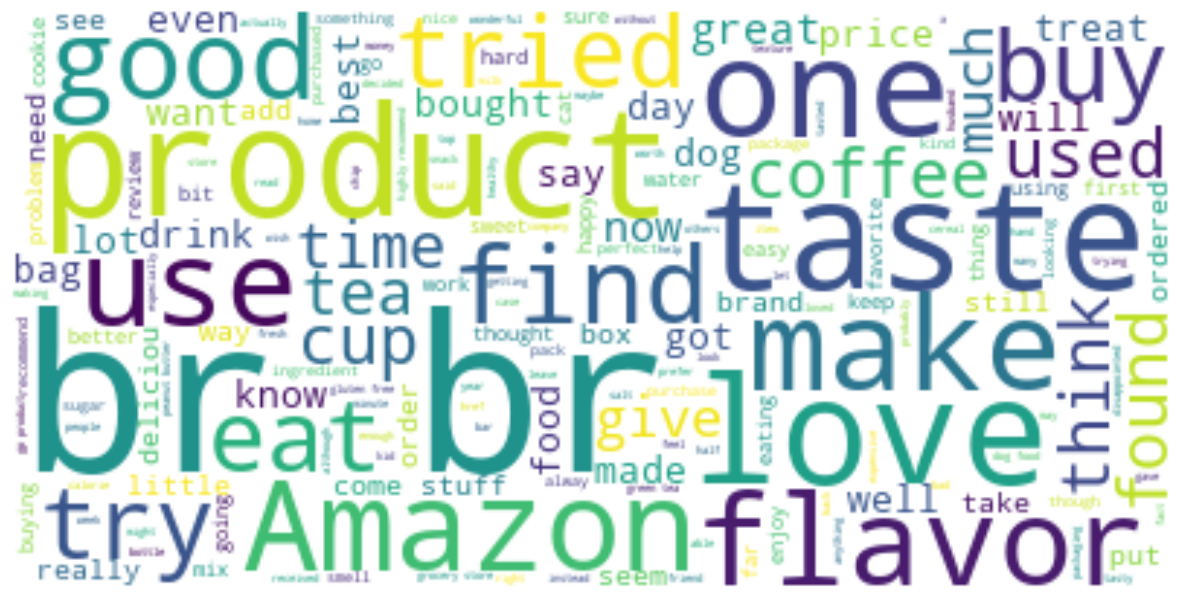

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in df.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# NLTK

**Word Tokenize a Sentence**

In [119]:
sentence= df['Text'][1]
print(sentence)


Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


In [120]:
tokens=nltk.word_tokenize(sentence)

#To view tokens
tokens


['Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts',
 'were',
 'actually',
 'small',
 'sized',
 'unsalted',
 '.',
 'Not',
 'sure',
 'if',
 'this',
 'was',
 'an',
 'error',
 'or',
 'if',
 'the',
 'vendor',
 'intended',
 'to',
 'represent',
 'the',
 'product',
 'as',
 '``',
 'Jumbo',
 "''",
 '.']

**Frequency Distribution**

In [121]:
freq_dist = FreqDist(tokens)
print(freq_dist)
freq_dist.most_common(3)


<FreqDist with 31 samples and 37 outcomes>


[('the', 3), ('as', 2), ('Jumbo', 2)]

**Stopwords**

In [123]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
print(stop_words)


{'a', 'ours', 'my', 'not', 'have', 'any', "hadn't", 'for', "didn't", 'above', 'shouldn', 'own', 'be', 'ourselves', "that'll", 'which', 'only', "shouldn't", 'as', 'before', "she's", 'over', 'once', 'll', 'haven', 'you', 'on', 'nor', 'but', "wasn't", 'them', 'i', 'how', "it's", 'yourselves', 'most', 'through', 'hadn', 'just', 'needn', 'too', 'his', 'the', 'out', 'did', 'should', "aren't", "weren't", 'more', 'an', 'into', 'wouldn', "you're", 'weren', "haven't", 'your', 'he', 'ain', 'so', 'didn', 've', 'doing', 'yourself', 'both', 'been', "won't", 'about', 'has', "isn't", "wouldn't", 'do', 'it', 'then', 't', 's', 'having', 'each', 'if', 'hasn', 'some', 'hers', 'our', 'to', "couldn't", 'below', 'its', 'these', 'themselves', 'o', 'or', 'again', 'other', 'we', 'couldn', 'can', 'off', 'in', 'from', 'between', 'aren', 'while', 'yours', 'y', 'had', 'who', "should've", "don't", "doesn't", 'myself', 'very', 'here', 'mustn', 'under', 'further', 'because', 'up', "mustn't", 'she', 'me', 'doesn', 'mig

**POS Tagging**

Determining the grammatical group a given the word belongs to is the main goal of Part-of-Speech (POS) tagging. According to the situation, it will determine whether it is a NOUN, PRONOUN, VERB, ADVERBS, etc. In order to tag a word, POS Tagging searches for relationships inside the phrase.

In [126]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amamo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [127]:
parts_of_speech=nltk.pos_tag(tokens)
parts_of_speech


[('Product', 'NNP'),
 ('arrived', 'VBD'),
 ('labeled', 'VBN'),
 ('as', 'IN'),
 ('Jumbo', 'NNP'),
 ('Salted', 'NNP'),
 ('Peanuts', 'NNP'),
 ('...', ':'),
 ('the', 'DT'),
 ('peanuts', 'NNS'),
 ('were', 'VBD'),
 ('actually', 'RB'),
 ('small', 'JJ'),
 ('sized', 'VBN'),
 ('unsalted', 'JJ'),
 ('.', '.'),
 ('Not', 'RB'),
 ('sure', 'JJ'),
 ('if', 'IN'),
 ('this', 'DT'),
 ('was', 'VBD'),
 ('an', 'DT'),
 ('error', 'NN'),
 ('or', 'CC'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('vendor', 'NN'),
 ('intended', 'VBN'),
 ('to', 'TO'),
 ('represent', 'VB'),
 ('the', 'DT'),
 ('product', 'NN'),
 ('as', 'IN'),
 ('``', '``'),
 ('Jumbo', 'NNP'),
 ("''", "''"),
 ('.', '.')]

# Vader Sentiment Analysis

Text sentiment analysis is carried out using the VADER (Valence Aware Dictionary for Sentiment Reasoning) model, which is sensitive to both the polarity (positive/negative) and intensity (strength) of emotion. In addition to reporting on positivity and negativity scores, VADER also provides information about the sentiment of a statement. One can calculate the sentiment score of a text by multiplying the intensity of each word in the text. Vader is very intelligent in knowing positive and negative sentences based on the words in the sentence.

The Compound score in Vader is a measurement that adds together all lexical ratings that have been scaled between -1 (the most extreme negative) and +1. (most extreme positive).

**Load Model**

In [133]:
df=df.head(5000)


In [134]:
SIA=SentimentIntensityAnalyzer()
SIA.polarity_scores(sentence)


{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}

SentimentIntensityAnalyzer() of VADER analyses a string and produces a dictionary of scores in four categories: Negative, Neutral, Positive, and Compound, obtained by normalizing the remaining three scores.

**Create Vader Data Frame**

We created polarity scores for all the texts in the data frame and got negative, neutral, positive, and compound scores for each. Then we merged this data into the original data frame and created the Vader data frame.

In [135]:
#create empty dictionary to store results
results={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    myid=row['Id']
    results[myid]=SIA.polarity_scores(text)
Vaders=pd.DataFrame(results).T
Vaders= Vaders.reset_index().rename(columns={'index': 'Id'})
Vaders=Vaders.merge(df,how='left')
Vaders


  0%|          | 0/5000 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


# RoBERTa Model

RoBERTa is a transformers model that was self-supervised and pre-trained on a huge corpus of English data. This indicates that it was just pre-trained on the raw texts, without any human labeling, with an automatic procedure that uses the texts to produce inputs and labels. RoBERTa and BERT differ significantly from each other in that RoBERTa was learned using a larger dataset and a more efficient training method. RoBERTa was specifically trained on a dataset of 160GB of text, which is more than 10 times bigger than the dataset used to train BERT. Roberta analyses a string and produces a dictionary of scores in three categories: Negative, Neutral, and Positive.

**Load Model and Create Tokenizer**

In [136]:
#Load the pre-trained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


c:\Users\amamo\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



**Roberta’s polarity scores**

We will create Roberta’s polarity score for each text and add it to the data frame.

In [137]:
def roberta_polarity_scores(sentence):
    encoded_text = tokenizer(sentence, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict
    
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_polarity_scores(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke at id {myid}')


results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')


  0%|          | 0/5000 [00:00<?, ?it/s]

Broke at id 83
Broke at id 187
Broke at id 529
Broke at id 540
Broke at id 746
Broke at id 863
Broke at id 1053
Broke at id 1070
Broke at id 1156
Broke at id 1321
Broke at id 1375
Broke at id 1498
Broke at id 1575
Broke at id 1796
Broke at id 1826
Broke at id 2169
Broke at id 2248
Broke at id 2476
Broke at id 2492
Broke at id 2584
Broke at id 2610
Broke at id 2897
Broke at id 2898
Broke at id 2902
Broke at id 2928
Broke at id 2942
Broke at id 2944
Broke at id 2947
Broke at id 2948
Broke at id 3022
Broke at id 3023
Broke at id 3025
Broke at id 3306
Broke at id 3788
Broke at id 3969
Broke at id 4107
Broke at id 4110
Broke at id 4307
Broke at id 4316
Broke at id 4408
Broke at id 4483
Broke at id 4512
Broke at id 4553
Broke at id 4583


**Display Final Data Frame and Dataset Columns**

In [138]:
results_df

# To view columns
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [139]:
results_df.head()


,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
